In [1]:
# packages
#install.packages("ggcharts")
#install.packages("rhandsontable")
#install.packages("gridExtra")
#install.packages("Hmisc")
#install.packages("tidyverse")
#install.packages("plyr")
library(tidyverse)
library(Hmisc)
library(rhandsontable)
library(readxl)
library(plyr)
# turn off warning
options(warn=0)

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.1.1     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: 'Hmisc'


The following objects are masked from 'package:dplyr':

    src, summarize


The following objects are masked from 'package:base':

    format.pval, units


------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

---------------------------------------------------------

Tôi đã đưa file dữ liệu này lên github nên ở đây tôi sẽ đọc trực tiếp nó từ github, như vậy thì bất cứ ai khi tải source code này về đều có thể đọc ngay được mà không cần chỉnh sửa.
 

In [2]:
url <-"https://raw.githubusercontent.com/ThanhHung2112/PTDL_R/main/mouse_crawler/Ecommer_tiki(mouse).csv"
df <- read.csv('Ecommer_tiki(mouse).csv', header = TRUE, quote = "\"",  fill = TRUE, comment.char = "", encoding = "UTF-8")

In [3]:
head(df)

,X,Name,Product_price,Discount,Sale_price,Shop,Brand,Warranty,Warranty_way,Warranty_place,Sold,Rate,Comment,X5,X4,X3,X2,X1,m_link
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>
1,0,Chu<U+1ED9>t máy vi tính Bosston D608 led - Hàng Chính Hãng,60,0.05,57.1,,Bossto,0,0,0,364,4.7,93,78,8,5,0,2,https://tiki.vn/chuot-may-vi-tinh-bosston-d608-led-hang-chinh-hang-p9355345.html?spid=56764717
2,1,"Chu<U+1ED9>t máy tính có dây EDRA EM602 Ð<U+1ED9> Phân Gi<U+1EA3>i 1200 DPI, choi game, cho Laptop hàng chính hãng",148,0.00,148.0,Extreme Zero Online,E-DRA,24,Tem b<U+1EA3>o hành,B<U+1EA3>o hành chính hãng,85,4.9,24,22,2,0,0,0,https://tiki.vn/chuot-may-tinh-co-day-edra-em602-do-phan-giai-1200-dpi-choi-game-cho-laptop-hang-chinh-hang-p74463237.html?spid=90107321
3,2,"Chu<U+1ED9>t máy tính có dây G5 ES, chu<U+1ED9>t gaming DPI 4 c<U+1EA5>p d<U+1ED9>, hi<U+1EC7>u <U+1EE9>ng dèn n<U+1EC1>n 7 màu- Hàng nh<U+1EAD>p kh<U+1EA9>u",129,0.00,129.0,HOÀNG NHÂN COMPUTER,Zealot,3,Tem b<U+1EA3>o hành,B<U+1EA3>o hành b<U+1EDF>i nhà bán hàng thông qua Tiki,185,4.7,64,53,7,0,1,3,https://tiki.vn/chuot-may-tinh-co-day-g5-es-chuot-gaming-dpi-4-cap-do-hieu-ung-den-nen-7-mau-hang-nhap-khau-p75614175.html?spid=91088172
4,3,Chu<U+1ED9>t máy tính Newmen G10 - Hàng Chính Hãng,145,0.00,145.0,Vi Tính Lê Huy,Newme,0,0,0,1000,4.7,135,106,20,6,0,3,https://tiki.vn/chuot-may-tinh-newmen-g10-hang-chinh-hang-p7975728.html?spid=7975732
5,4,Chu<U+1ED9>t máy tính van phòng T<U+1EB7>ng lót chu<U+1ED9>t cao c<U+1EA5>p,158,0.00,158.0,VLC6 Store,OEM,0,0,0,55,5.0,9,9,0,0,0,0,https://tiki.vn/chuot-may-tinh-van-phong-tang-lot-chuot-cao-cap-p86900816.html?spid=120777689
6,5,"Chu<U+1ED9>t van phòng có dây, chu<U+1ED9>t Game HXSJ A885 DPI 5500, RGB d<U+1ED5>i 7 màu liên t<U+1EE5>c, chuyên dùng cho laptop, máy tính, pc - Hàng chính hãng",299,0.36,192.0,HXSJ Official Store,HXSJ,6,Hóa don,B<U+1EA3>o hành b<U+1EDF>i nhà bán hàng thông qua Tiki,39,5.0,13,13,0,0,0,0,https://tiki.vn/chuot-van-phong-co-day-chuot-game-hxsj-a885-dpi-5500-rgb-doi-7-mau-lien-tuc-hang-chinh-hang-p121169235.html?spid=121169237


# Data Information( Thông số dữ liệu)

Sau khi mở file dữ liệu chúng ta sử dụng một số hàm để kiểm tra dữ liệu và xác định tính chất của dữ liệu

Các hàm sau đây sẽ cho chúng ta thông tin về việc:
 + Missing data( thiếu dữ liệu)
 + Số cột, dòng
 + Thuộc tính dữ liệu( số, ký tự)

Từ đó, ta có thể dễ dàng xác định các biến định tính và định lượng

In [4]:
# shows the structure of the data frame
str(df)

'data.frame':	253 obs. of  19 variables:
 $ X             : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Name          : chr  "Chu<U+1ED9>t máy vi tính Bosston D608 led - Hàng Chính Hãng" "Chu<U+1ED9>t máy tính có dây EDRA EM602 Ð<U+1ED9> Phân Gi<U+1EA3>i 1200 DPI, choi game, cho Laptop hàng chính hãng" "Chu<U+1ED9>t máy tính có dây G5 ES, chu<U+1ED9>t gaming DPI 4 c<U+1EA5>p d<U+1ED9>, hi<U+1EC7>u <U+1EE9>ng dèn "| __truncated__ "Chu<U+1ED9>t máy tính Newmen G10 - Hàng Chính Hãng" ...
 $ Product_price : num  60 148 129 145 158 ...
 $ Discount      : num  0.05 0 0 0 0 0.36 0 0.26 0 0 ...
 $ Sale_price    : num  57.1 148 129 145 158 ...
 $ Shop          : chr  "" "Extreme Zero Online" "HOÀNG NHÂN COMPUTER" "Vi Tính Lê Huy" ...
 $ Brand         : chr  "Bossto" "E-DRA" "Zealot" "Newme" ...
 $ Warranty      : num  0 24 3 0 0 6 1 12 0 3 ...
 $ Warranty_way  : chr  "0" "Tem b<U+1EA3>o hành" "Tem b<U+1EA3>o hành" "0" ...
 $ Warranty_place: chr  "0" "B<U+1EA3>o hành chính hãng" "B<U+1EA3>o hành b<U+1EDF>i 

In [5]:
#describe(df)


Sau khi kiếm tra thông số dữ liệu ta thấy răng không có dữ liệu bị thiếu hụt trong data frame. Bây giờ, tôi sẽ tạo thêm 3 cột thể hiện tính chất của dữ liệu để ta có thể hiểu hơn

+ Định giá : gồm 3 phân loại: low price, good price, hight price( Giá cao, Giá tốt, Giá thấp) thể hiện tính chất của giá bán
+ Thanh khoản : gồm 3 phân loại( Bán chạy, Bán được, Bán chậm) thể hiện xu thế của chuột máy tính trên thị trường
+ Chất lượng : gồm 3 phân loại( Tốt, Ổn định, Kém, Chưa thể phân loại) thể hiện chất lượng của sản phẩm dựa trên lượt đánh giá 




Với Valuation(Định giá) dựa trên thông tin ở mục Data information ta chia ra làm 3 mức 
+ Dưới 100k: Low price( Giá thấp)
+ Từ 100 --> 400k : Good price (Giá tốt)
+ Trên 400k : High price( Giá cao)

In [6]:
Valuation <- list()
for (i in df[,c('Sale_price')]) {
    if (i < 100){
        Valuation <- c(Valuation,'low price')
    } else if (i < 400) {
        Valuation <- c(Valuation,'good price')  
    } else {
        Valuation <- c(Valuation,'high price')
    }
}

Tương tự với Liquidity(Thanh khoản) ta cũng dựa vào Data Information và chia làm 3 mức:
+ Slow(chậm) : Số lượng sản phẩm bán ra < 50
+ Good(tốt) : Số lượng sản phẩm bán ra từ 50 - 300
+ Fast(nhanh) : Số lượng sản phẩm bán ra từ 300


In [7]:
Liquidity <- list()
for (i in df[,c('Sold')]) {
    if (i < 50){
        Liquidity <- c(Liquidity,'Slow')
    } else if (i < 300) {
        Liquidity <- c(Liquidity,'Good')  
    } else {
        Liquidity <- c(Liquidity,'Fast')
    }
}

Cuối cùng là cột Quality(Chất lượng) dựa trên đánh giá của người tiêu dùng.

Với những sản phẩm chưa có đánh giá thì ta chưa thể xác định rõ chất lượng nên sẽ thuộc loại "Unknow" (Chưa xác định)
Với những sản phẩm có lượt đânhs giá từ dười 15 thì:
+ Điểm đánh giá trên 4.7 : Chất lượng tốt
+ Điểm đánh giá dưới 4.7 : Chất lượng thấp

Sở  dĩ như vậy là bởi với 20 sản phẩm thì ta không thể cho rẳng sản phẩm có chất lượng cao được, ngoài ra chỉ với 20 sản phẩm mà điểm đánh giá nhỏ hơn 4.7 tức là có những lượt đánh giá 1,2,3 khá nhiều.
Với 20 lượt bán mà có lượt đánh giá 1,2,3 khá nhiều thì đây không thể là sản phẩm tốt được 

Cuối cùng, khi lượt đánh giá nhiều hơn thì cũng dễ phân loại hơn hẵn, ở đây tôi cũng sẽ phân làm 3 loại:
+ Điểm đánh giá trên 4.7 : High quality (Chất lượng cao)
+ Điểm đánh giá từ 4.4 - 4.6 : Good quality (Chất lượng tốt)
+ Điểm đánh giá dưới 4.4 : Low qualiy (Chất lượng thấp)

In [8]:
Quality <- list()
n = 1
for (i in df[,c('Comment')]) {

    rate <- df[,c('Rate')][n]
    
    if (i == 0){
        Quality <- c(Quality,'Unknown')
    } else if (i < 20){
        if (rate > 4.7){
            Quality <- c(Quality,'Good quality')
        } else {
            Quality <- c(Quality,'Low quality')
        }
    } else {
        if (rate > 4.7){
            Quality <- c(Quality,'High quality')
        } else if (rate >= 4.4){
            Quality <- c(Quality,'Good quality')
        } else {
            Quality <- c(Quality,'Low quality')
        }
    }
    n <- n+1
}

In [9]:
df <- df %>%
  add_column(Valuation = as.character(Valuation),
             .after = "Sale_price")
df <- df %>%
  add_column(Liquidity = as.character(Liquidity),
             .after = "Sold")
df <- df %>%
  add_column(Quality = as.character(Quality),
             .after  = 'Warranty_place')

In [10]:
head(df, 10)

,X,Name,Product_price,Discount,Sale_price,Valuation,Shop,Brand,Warranty,Warranty_way,...,Sold,Liquidity,Rate,Comment,X5,X4,X3,X2,X1,m_link
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,...,<dbl>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>
1,0,Chu<U+1ED9>t máy vi tính Bosston D608 led - Hàng Chính Hãng,60.00,0.05,57.10,low price,,Bossto,0,0,...,364,Fast,4.7,93,78,8,5,0,2,https://tiki.vn/chuot-may-vi-tinh-bosston-d608-led-hang-chinh-hang-p9355345.html?spid=56764717
2,1,"Chu<U+1ED9>t máy tính có dây EDRA EM602 Ð<U+1ED9> Phân Gi<U+1EA3>i 1200 DPI, choi game, cho Laptop hàng chính hãng",148.00,0.00,148.00,good price,Extreme Zero Online,E-DRA,24,Tem b<U+1EA3>o hành,...,85,Good,4.9,24,22,2,0,0,0,https://tiki.vn/chuot-may-tinh-co-day-edra-em602-do-phan-giai-1200-dpi-choi-game-cho-laptop-hang-chinh-hang-p74463237.html?spid=90107321
3,2,"Chu<U+1ED9>t máy tính có dây G5 ES, chu<U+1ED9>t gaming DPI 4 c<U+1EA5>p d<U+1ED9>, hi<U+1EC7>u <U+1EE9>ng dèn n<U+1EC1>n 7 màu- Hàng nh<U+1EAD>p kh<U+1EA9>u",129.00,0.00,129.00,good price,HOÀNG NHÂN COMPUTER,Zealot,3,Tem b<U+1EA3>o hành,...,185,Good,4.7,64,53,7,0,1,3,https://tiki.vn/chuot-may-tinh-co-day-g5-es-chuot-gaming-dpi-4-cap-do-hieu-ung-den-nen-7-mau-hang-nhap-khau-p75614175.html?spid=91088172
4,3,Chu<U+1ED9>t máy tính Newmen G10 - Hàng Chính Hãng,145.00,0.00,145.00,good price,Vi Tính Lê Huy,Newme,0,0,...,1000,Fast,4.7,135,106,20,6,0,3,https://tiki.vn/chuot-may-tinh-newmen-g10-hang-chinh-hang-p7975728.html?spid=7975732
5,4,Chu<U+1ED9>t máy tính van phòng T<U+1EB7>ng lót chu<U+1ED9>t cao c<U+1EA5>p,158.00,0.00,158.00,good price,VLC6 Store,OEM,0,0,...,55,Good,5.0,9,9,0,0,0,0,https://tiki.vn/chuot-may-tinh-van-phong-tang-lot-chuot-cao-cap-p86900816.html?spid=120777689
6,5,"Chu<U+1ED9>t van phòng có dây, chu<U+1ED9>t Game HXSJ A885 DPI 5500, RGB d<U+1ED5>i 7 màu liên t<U+1EE5>c, chuyên dùng cho laptop, máy tính, pc - Hàng chính hãng",299.00,0.36,192.00,good price,HXSJ Official Store,HXSJ,6,Hóa don,...,39,Slow,5.0,13,13,0,0,0,0,https://tiki.vn/chuot-van-phong-co-day-chuot-game-hxsj-a885-dpi-5500-rgb-doi-7-mau-lien-tuc-hang-chinh-hang-p121169235.html?spid=121169237
7,6,Chu<U+1ED9>t máy tính cao c<U+1EA5>p,81.44,0.00,81.44,low price,vinet shop,OEM,1,Tem b<U+1EA3>o hành,...,204,Good,4.5,79,51,18,8,1,1,https://tiki.vn/chuot-may-tinh-cao-cap-p56288980.html?spid=58946387
8,7,"Chu<U+1ED9>t máy tính có dây PROLiNK PMC1006 BDLU (den xanh), c<U+1EA3>m bi<U+1EBF>n quang h<U+1ECD>c 1000DPI - Hàng chính hãng",120.00,0.26,89.00,low price,,Prolink,12,Tem b<U+1EA3>o hành,...,15,Slow,5.0,4,4,0,0,0,0,https://tiki.vn/chuot-may-tinh-co-day-prolink-pmc1006-bdlu-den-xanh-cam-bien-quang-hoc-1000dpi-hang-chinh-hang-p112529886.html?spid=112529887
9,8,Chu<U+1ED9>t máy vi tính Bosston D608 LED - Ðen-Hàng Chính Hãng,57.40,0.00,57.40,low price,VI TÍNH NAM TRUNG H<U+1EA2>I,Bossto,0,0,...,111,Good,4.7,29,22,5,1,1,0,https://tiki.vn/chuot-may-vi-tinh-bosston-d608-led-den-hang-chinh-hang-p11191145.html?spid=48957656


# The Center Tendency (Các phép tính hướng tâm)


Ta thấy cột "Link" trong dataframe không cung cấp thông tin cho việc phân tích dữ liệu nên ta sẽ tiến hành loại bỏ cột này khỏi dataframe để tiến hành phân tích dữ liệu một cách tiện và gọn hơn

In [11]:
df <- subset( df, select = - m_link)
df <- subset( df, select = - X)

Nhờ việc xem thông số dữ liệu, ta có thể dễ dàng tìm ra được các biến định tính và định lượng:
+ quantitative variable( Biến định lượng) : Product_price, Sale_price, Discount, Warranty, Sold, Rate, Comment, 5, 4, 3, 2, 1
+ categorical variable( Biến định tính) : Valuation, Brand ,Warranty_way, Warranty_place, Liquidity


In [12]:
head(df)

,Name,Product_price,Discount,Sale_price,Valuation,Shop,Brand,Warranty,Warranty_way,Warranty_place,Quality,Sold,Liquidity,Rate,Comment,X5,X4,X3,X2,X1
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,Chu<U+1ED9>t máy vi tính Bosston D608 led - Hàng Chính Hãng,60,0.05,57.1,low price,,Bossto,0,0,0,Good quality,364,Fast,4.7,93,78,8,5,0,2
2,"Chu<U+1ED9>t máy tính có dây EDRA EM602 Ð<U+1ED9> Phân Gi<U+1EA3>i 1200 DPI, choi game, cho Laptop hàng chính hãng",148,0.00,148.0,good price,Extreme Zero Online,E-DRA,24,Tem b<U+1EA3>o hành,B<U+1EA3>o hành chính hãng,High quality,85,Good,4.9,24,22,2,0,0,0
3,"Chu<U+1ED9>t máy tính có dây G5 ES, chu<U+1ED9>t gaming DPI 4 c<U+1EA5>p d<U+1ED9>, hi<U+1EC7>u <U+1EE9>ng dèn n<U+1EC1>n 7 màu- Hàng nh<U+1EAD>p kh<U+1EA9>u",129,0.00,129.0,good price,HOÀNG NHÂN COMPUTER,Zealot,3,Tem b<U+1EA3>o hành,B<U+1EA3>o hành b<U+1EDF>i nhà bán hàng thông qua Tiki,Good quality,185,Good,4.7,64,53,7,0,1,3
4,Chu<U+1ED9>t máy tính Newmen G10 - Hàng Chính Hãng,145,0.00,145.0,good price,Vi Tính Lê Huy,Newme,0,0,0,Good quality,1000,Fast,4.7,135,106,20,6,0,3
5,Chu<U+1ED9>t máy tính van phòng T<U+1EB7>ng lót chu<U+1ED9>t cao c<U+1EA5>p,158,0.00,158.0,good price,VLC6 Store,OEM,0,0,0,Good quality,55,Good,5.0,9,9,0,0,0,0
6,"Chu<U+1ED9>t van phòng có dây, chu<U+1ED9>t Game HXSJ A885 DPI 5500, RGB d<U+1ED5>i 7 màu liên t<U+1EE5>c, chuyên dùng cho laptop, máy tính, pc - Hàng chính hãng",299,0.36,192.0,good price,HXSJ Official Store,HXSJ,6,Hóa don,B<U+1EA3>o hành b<U+1EDF>i nhà bán hàng thông qua Tiki,Good quality,39,Slow,5.0,13,13,0,0,0,0


In [13]:
quantitative <- c('Product_price','Sale_price', 'Discount', 'Warranty', 'Sold', 'Rate', 'Comment', 'X5', 'X4', 'X3', 'X2', 'X1')
categorical <- c('Valuation', 'Brand' ,'Warranty_way', 'Warranty_place', 'Liquidity')

In [14]:
# describe table 

#describe(df)

In [15]:
summary(df)

     Name           Product_price       Discount         Sale_price    
 Length:253         Min.   :  35.0   Min.   :0.00000   Min.   :  30.0  
 Class :character   1st Qu.:  89.0   1st Qu.:0.00000   1st Qu.:  86.0  
 Mode  :character   Median : 123.0   Median :0.00000   Median : 120.0  
                    Mean   : 209.9   Mean   :0.04628   Mean   : 193.5  
                    3rd Qu.: 189.0   3rd Qu.:0.00000   3rd Qu.: 179.0  
                    Max.   :6700.0   Max.   :0.88000   Max.   :6700.0  
  Valuation             Shop              Brand              Warranty    
 Length:253         Length:253         Length:253         Min.   : 0.00  
 Class :character   Class :character   Class :character   1st Qu.: 0.00  
 Mode  :character   Mode  :character   Mode  :character   Median : 3.00  
                                                          Mean   : 7.02  
                                                          3rd Qu.:12.00  
                                                    

In [16]:
var(df[,c(quantitative)])

,Product_price,Sale_price,Discount,Warranty,Sold,Rate,Comment,X5,X4,X3,X2,X1
Product_price,214591.51785,2.064477e+05,6.753269552,1.054459e+03,12608.642712,68.03678051,1.246355e+04,1.068265e+04,1.086276e+03,265.833198,142.832962702,2.859533e+02
Sale_price,206447.72135,2.051985e+05,-0.727436899,1.052770e+03,11725.276911,44.06497669,1.246842e+04,1.070477e+04,1.075978e+03,257.625901,143.903377251,2.861506e+02
Discount,6.75327,-7.274369e-01,0.014544077,3.741499e-02,2.622419,0.05943243,1.363539e-01,3.943472e-02,7.523261e-02,0.020189,-0.002102861,3.600445e-03
Warranty,1054.45883,1.052770e+03,0.037414988,9.089247e+01,379.405954,0.58684202,1.530953e+03,1.341254e+03,1.353064e+02,19.339294,11.565938892,2.348824e+01
Sold,12608.64271,1.172528e+04,2.622418753,3.794060e+02,36669.328440,166.48304787,2.769289e+04,2.390488e+04,2.825446e+03,416.023151,183.857958467,3.626747e+02
Rate,68.03678,4.406498e+01,0.059432430,5.868420e-01,166.483048,5.22110107,9.940230e+01,8.443596e+01,1.101815e+01,1.773970,0.703883556,1.470340e+00
Comment,12463.54751,1.246842e+04,0.136353912,1.530953e+03,27692.885250,99.40230096,1.003483e+05,8.786194e+04,8.955020e+03,1289.009583,737.906691135,1.504419e+03
X5,10682.65208,1.070477e+04,0.039434720,1.341254e+03,23904.883446,84.43595897,8.786194e+04,7.694631e+04,7.825413e+03,1126.119612,646.334901813,1.317764e+03
X4,1086.27599,1.075978e+03,0.075232606,1.353064e+02,2825.446044,11.01814888,8.955020e+03,7.825413e+03,8.156178e+02,116.333396,65.146558755,1.325091e+02
X3,265.83320,2.576259e+02,0.020189002,1.933929e+01,416.023151,1.77396951,1.289010e+03,1.126120e+03,1.163334e+02,17.480833,9.567570111,1.950817e+01


In [17]:
Mode <- function(dataframe){
    mode <- c()
    name <- c()

    getmode <- function(v) {
        uniqv <- unique(v)
        uniqv[which.max(tabulate(match(v, uniqv)))]
    }
    for (i in names(dataframe)){
        name <- c(name,i)
    } 
    for (i in 1:length(dataframe)){
        mode <- c(mode, getmode(df[,i]))
    }
    data.frame(name,mode)
}

In [18]:
Mode(df)

name,mode
<chr>,<chr>
Name,"Chu<U+1ED9>t máy tính có dây G3SE thi<U+1EBF>t k<U+1EBF> nh<U+1ECF> g<U+1ECD>n, Led bao quanh d<U+1EB9>p m<U+1EAF>t, DPI tùy ch<U+1EC9>nh"
Product_price,99
Discount,0
Sale_price,99
Valuation,good price
Shop,
Brand,OEM
Warranty,0
Warranty_way,0


In [19]:
# dependencies between values

In [20]:
# plot of dependencies value

# Data Visualization( Trực quan hóa dữ liệu)

Việc trực quan hóa dữ liệu giúp ta có một cái nhìn rõ ràng và thêm tổng quát hơn về dữ liệu, giúp nhìn nhận rõ ràng những vấn đề của dữ liệu và so sánh một cách dễ dàng

In [55]:
data = aggregate(Sold ~ Brand, df, sum)
head(data, 10)

,Brand,Sold
,<chr>,<dbl>
1,-WOLF,0
2,A4Tec,170
3,ACTTO,0
4,ADBLink,0
5,Ajazz,0
6,AKKO,0
7,amayoko,2318
8,APEDRA,19
9,argus,0


Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

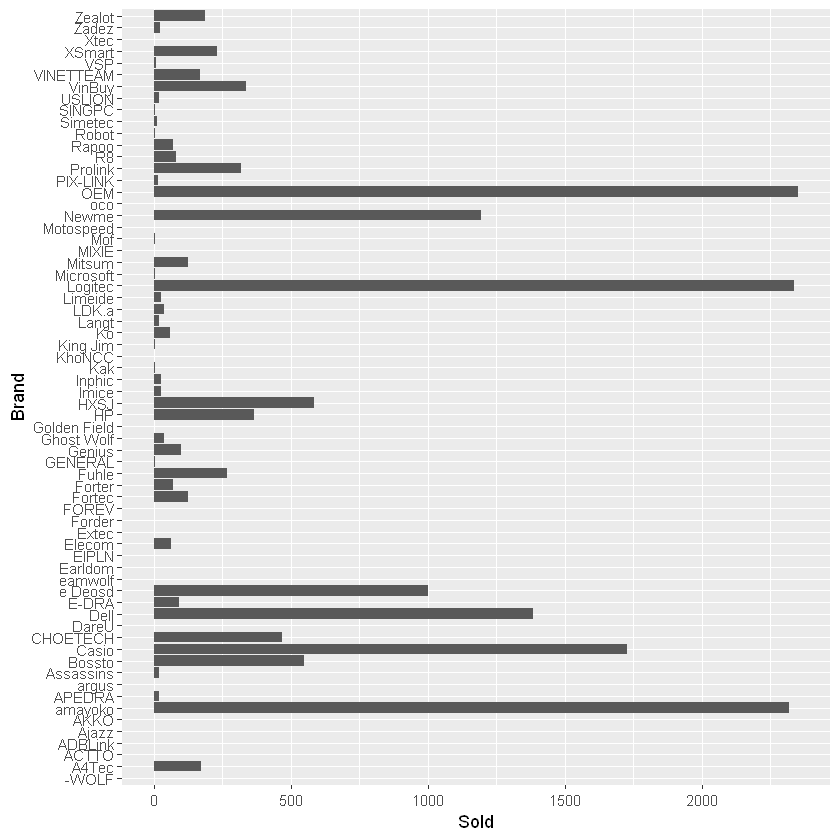

In [54]:
# Biểu đồ thể hiện số lượng sản phẩm bán được giữa các brand

ggplot(data, aes(x=Brand, y=Sold)) + 
  geom_bar(stat = "identity") + 
  coord_flip()

In [23]:
data = aggregate(df$Valuation, by=list(df$Valuation), FUN=length)
data


Group.1,x
<chr>,<int>
good price,139
high price,16
low price,98


In [24]:
data = aggregate(df$Liquidity, by=list(df$Liquidity), FUN=length)
data

Group.1,x
<chr>,<int>
Fast,18
Good,29
Slow,206


In [45]:
data = aggregate(df$Quality, by=list(df$Quality), FUN=length)
data

Group.1,x
<chr>,<int>
Good quality,56
High quality,15
Low quality,49
Unknown,133


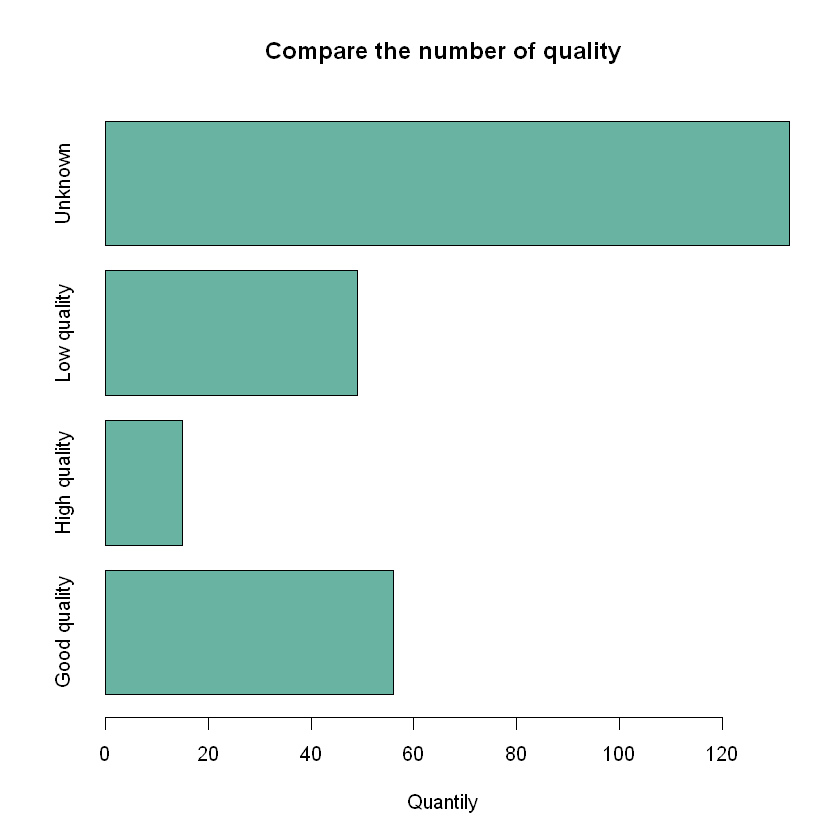

In [49]:
barplot(height=data$x, names=data$Group.1,
        col="#69b3a2",
        horiz=T, las=0,
        xlab="Quantily", 
        main="Compare the number of quality",
        )

In [36]:

counts <- ddply(df, .(df$Liquidity, df$Valuation), nrow)
names(counts) <- c('liq', 'Val', 'Num')
counts

liq,Val,Num
<chr>,<chr>,<int>
Fast,good price,12
Fast,high price,4
Fast,low price,2
Good,good price,18
Good,low price,11
Slow,good price,109
Slow,high price,12
Slow,low price,85


In [37]:
fast <- counts[1:3,]
good <- counts[4:5,]
slow <- counts[6:9,]

In [38]:
fast

,liq,Val,Num
,<chr>,<chr>,<int>
1,Fast,good price,12
2,Fast,high price,4
3,Fast,low price,2


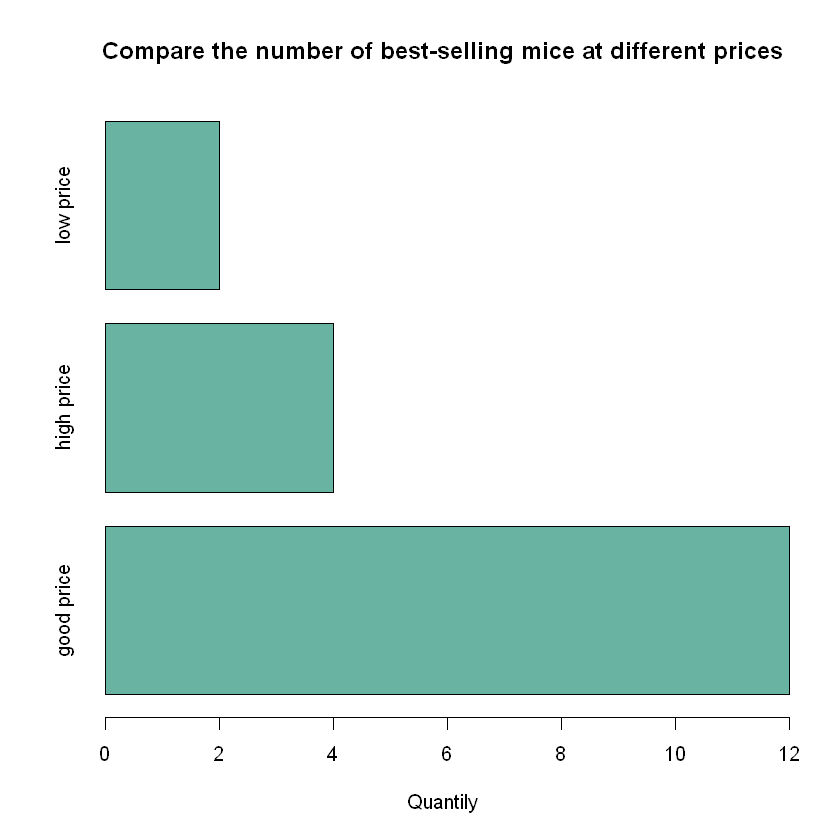

In [43]:
barplot(height=fast$Num, names=fast$Val,
        col="#69b3a2",
        horiz=T, las=0,
        xlab="Quantily", 
        main="Compare the number of best-selling mice at different prices",
        )


In [ ]:
counts <- ddply(df, .(df$Liquidity, df$Warranty), nrow)
counts

In [57]:
head(df)

,Name,Product_price,Discount,Sale_price,Valuation,Shop,Brand,Warranty,Warranty_way,Warranty_place,Quality,Sold,Liquidity,Rate,Comment,X5,X4,X3,X2,X1
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,Chu<U+1ED9>t máy vi tính Bosston D608 led - Hàng Chính Hãng,60,0.05,57.1,low price,,Bossto,0,0,0,Good quality,364,Fast,4.7,93,78,8,5,0,2
2,"Chu<U+1ED9>t máy tính có dây EDRA EM602 Ð<U+1ED9> Phân Gi<U+1EA3>i 1200 DPI, choi game, cho Laptop hàng chính hãng",148,0.00,148.0,good price,Extreme Zero Online,E-DRA,24,Tem b<U+1EA3>o hành,B<U+1EA3>o hành chính hãng,High quality,85,Good,4.9,24,22,2,0,0,0
3,"Chu<U+1ED9>t máy tính có dây G5 ES, chu<U+1ED9>t gaming DPI 4 c<U+1EA5>p d<U+1ED9>, hi<U+1EC7>u <U+1EE9>ng dèn n<U+1EC1>n 7 màu- Hàng nh<U+1EAD>p kh<U+1EA9>u",129,0.00,129.0,good price,HOÀNG NHÂN COMPUTER,Zealot,3,Tem b<U+1EA3>o hành,B<U+1EA3>o hành b<U+1EDF>i nhà bán hàng thông qua Tiki,Good quality,185,Good,4.7,64,53,7,0,1,3
4,Chu<U+1ED9>t máy tính Newmen G10 - Hàng Chính Hãng,145,0.00,145.0,good price,Vi Tính Lê Huy,Newme,0,0,0,Good quality,1000,Fast,4.7,135,106,20,6,0,3
5,Chu<U+1ED9>t máy tính van phòng T<U+1EB7>ng lót chu<U+1ED9>t cao c<U+1EA5>p,158,0.00,158.0,good price,VLC6 Store,OEM,0,0,0,Good quality,55,Good,5.0,9,9,0,0,0,0
6,"Chu<U+1ED9>t van phòng có dây, chu<U+1ED9>t Game HXSJ A885 DPI 5500, RGB d<U+1ED5>i 7 màu liên t<U+1EE5>c, chuyên dùng cho laptop, máy tính, pc - Hàng chính hãng",299,0.36,192.0,good price,HXSJ Official Store,HXSJ,6,Hóa don,B<U+1EA3>o hành b<U+1EDF>i nhà bán hàng thông qua Tiki,Good quality,39,Slow,5.0,13,13,0,0,0,0


In [ ]:
# Biểu đồ thể hiện sự đánh giá sản phẩm giữa các brand

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

In [ ]:
# Biểu đồ thể hiện giá cả trung bình giữa các brand


Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows